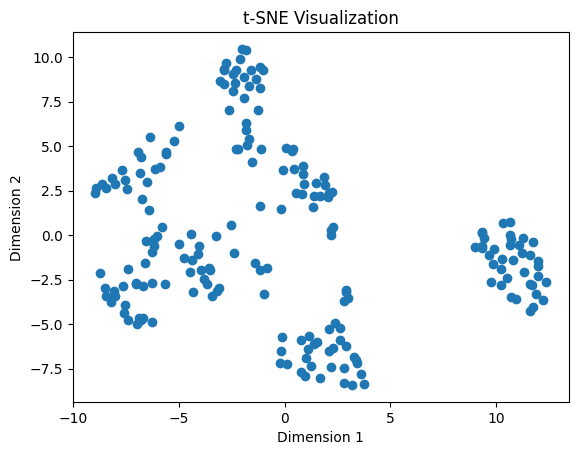

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


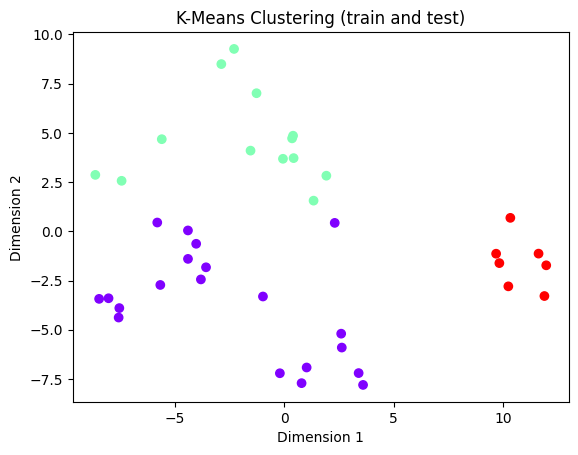

Silhouette Score: 0.4522377848625183
Inertia for Training Data: 2713.7197265625
Inertia for Testing Data: 2713.7197265625


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

data = pd.read_csv('Mall_Customers.csv')
customer_ids = data['CustomerID']
X = data.select_dtypes(include=[np.number])

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

tsne = TSNE(n_components=2, perplexity=30, n_iter=300)
X_tsne = tsne.fit_transform(X_scaled)

plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.title('t-SNE Visualization')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

kmeans = KMeans(n_clusters=3)
cluster_labels = kmeans.fit_predict(X_tsne)

data['Cluster'] = cluster_labels

X_train, X_test, cluster_labels_train, cluster_labels_test = train_test_split(X_tsne, cluster_labels, test_size=0.2, random_state=42)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X_train)

cluster_labels_test_predicted = kmeans.predict(X_test)

plt.scatter(X_test[:, 0], X_test[:, 1], c=cluster_labels_test_predicted, cmap='rainbow')
plt.title('K-Means Clustering (train and test)')
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.show()

silhouette = silhouette_score(X_test, cluster_labels_test_predicted)
print(f"Silhouette Score: {silhouette}")

inertia_train = kmeans.inertia_
print(f"Inertia for Training Data: {inertia_train}")
inertia_test = kmeans.inertia_
print(f"Inertia for Testing Data: {inertia_test}")